# 지하철 이용객 분석
 - https://data.busan.go.kr/
 - 승하차 인원정보 검색
 - 일별역별시간대별승하차 파일 받기

<img src="attachment:a63c7e54-f2ac-42e9-96fb-33c159bb39c9.png" width=200>

In [143]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"
df = pd.read_csv(file_path,encoding="euc-kr")
df.head()
# data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [92]:
columns0 = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns0 + time_col+ ['24~01H'] 
df.columns = columns
df = df.loc[:,:'total']

In [93]:
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [5]:
import pandas as pd
file_path = "./ref/광주교통공사역일시간대별승하차량20250131.csv"
df = pd.read_csv(file_path,encoding="utf-8")
df.head()
# data.tail()

,역번호,일자,역명,구분,총승하차승객,5_6,6_7,7_8,8_9,9_10,...,14_15,15_16,16_17,17_18,18_19,19_20,20_21,21_22,22_23,23_24
0,100,2025-01-01,녹동,승차,89,0,0,2,6,12,...,6,7,5,3,3,2,4,2,0,0
1,100,2025-01-01,녹동,하차,62,0,0,1,3,4,...,7,6,7,10,3,3,6,0,3,0
2,101,2025-01-01,소태,승차,1238,17,17,39,62,92,...,108,118,97,90,67,62,39,34,16,5
3,101,2025-01-01,소태,하차,1124,5,42,38,40,42,...,85,82,76,106,113,53,64,59,64,17
4,102,2025-01-01,학동증심사,승차,1064,14,18,32,45,79,...,64,90,110,92,56,30,17,9,10,7


In [6]:
columns = ['num', 'date', 'name', 'type','total']
time_col = [f"{i}_{i+1}" for i in range(5, 24)] 
columns = columns + time_col 

df.columns = columns
df = df.loc[:,:'total']

In [7]:
df.head()

,num,date,name,type,total
0,100,2025-01-01,녹동,승차,89
1,100,2025-01-01,녹동,하차,62
2,101,2025-01-01,소태,승차,1238
3,101,2025-01-01,소태,하차,1124
4,102,2025-01-01,학동증심사,승차,1064


In [8]:
df.tail()

,num,date,name,type,total
1235,117,2025-01-31,광주송정,하차,5067
1236,118,2025-01-31,도산,승차,1571
1237,118,2025-01-31,도산,하차,1322
1238,119,2025-01-31,평동,승차,1690
1239,119,2025-01-31,평동,하차,1734


In [1]:
data = df.groupby(['date','num','name']).sum().reset_index()
data[data['date']=='2025-01-01']
data

NameError: name 'df' is not defined

In [10]:
gdata = data[['name' ,'date' ,'total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
15,공항,2025-01-01,1028
35,공항,2025-01-02,2060
55,공항,2025-01-03,2135
75,공항,2025-01-04,1431
95,공항,2025-01-05,1052
115,공항,2025-01-06,2275
135,공항,2025-01-07,2252
155,공항,2025-01-08,2197
175,공항,2025-01-09,2236
195,공항,2025-01-10,2737


In [11]:
mdata = gdata.groupby(by="name").sum().reset_index()
mdata

,name,date,total
0,공항,2025-01-012025-01-022025-01-032025-01-042025-0...,58562
1,광주송정,2025-01-012025-01-022025-01-032025-01-042025-0...,286840
2,금남로4가,2025-01-012025-01-022025-01-032025-01-042025-0...,219610
3,금남로5가,2025-01-012025-01-022025-01-032025-01-042025-0...,111828
4,남광주,2025-01-012025-01-022025-01-032025-01-042025-0...,205923
5,녹동,2025-01-012025-01-022025-01-032025-01-042025-0...,9302
6,농성,2025-01-012025-01-022025-01-032025-01-042025-0...,158658
7,도산,2025-01-012025-01-022025-01-032025-01-042025-0...,83264
8,돌고개,2025-01-012025-01-022025-01-032025-01-042025-0...,96626
9,문화전당,2025-01-012025-01-022025-01-032025-01-042025-0...,183198


In [12]:
tdata = mdata[['name','total']]
tdata

,name,total
0,공항,58562
1,광주송정,286840
2,금남로4가,219610
3,금남로5가,111828
4,남광주,205923
5,녹동,9302
6,농성,158658
7,도산,83264
8,돌고개,96626
9,문화전당,183198


In [38]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
1,광주송정,286840
10,상무,230741
2,금남로4가,219610
4,남광주,205923
9,문화전당,183198
15,운천,172719
6,농성,158658
14,양동시장,141279
12,송정공원,139795
13,쌍촌,127882


In [39]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"]="D2Coding"

In [40]:
# for font in fm.findSystemFonts():
#     print(font)

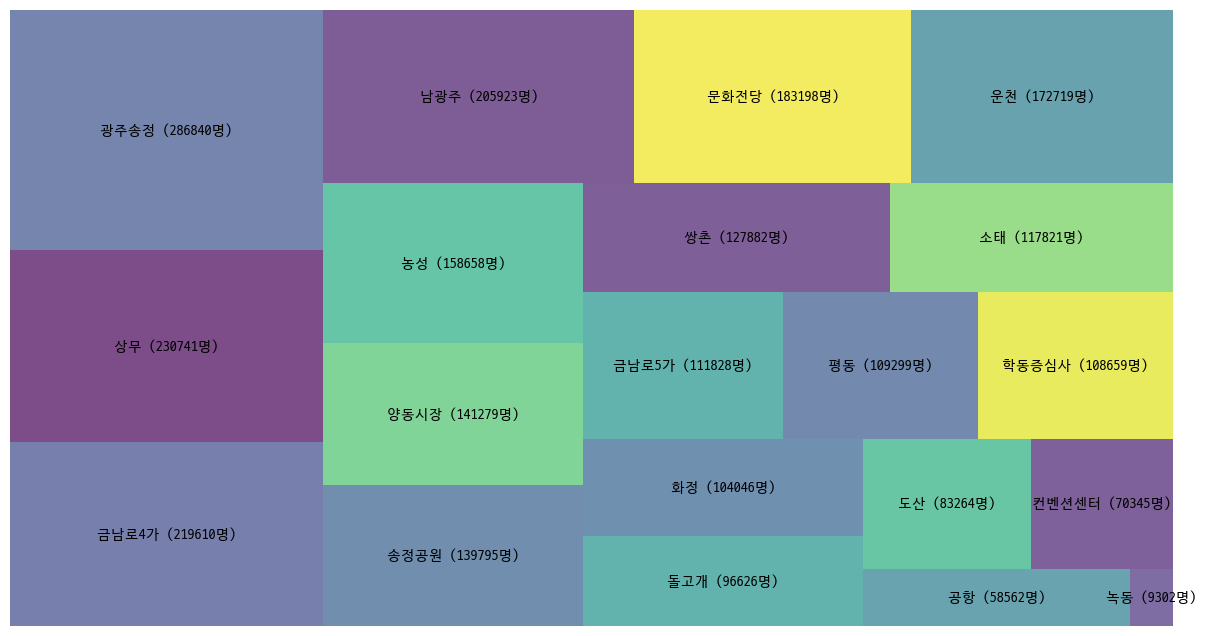

In [50]:
import squarify

plt.figure(figsize=(15,8))
squarify.plot(sizes=total_data['total'], label=[f"{str(x[0]).strip()} ({str(x[1]).strip()}명)" for x in zip(total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

In [35]:
!pip install squarify